In [37]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.tsa.holtwinters import Holt
import plotly.express as px

In [5]:
from google.colab import files
uploaded = files.upload()


Saving FAOSTAT_data_en_2-10-2026.csv to FAOSTAT_data_en_2-10-2026.csv


In [14]:
df = pd.read_csv("FAOSTAT_data_en_2-10-2026.csv")

df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,14,Eastern Africa,5312,Area harvested,1929.07,"Abaca, manila hemp, raw",1996,1996,ha,28.00,E,Estimated value,NaN
1,QCL,Crops and livestock products,14,Eastern Africa,5412,Yield,1929.07,"Abaca, manila hemp, raw",1996,1996,kg/ha,1153.30,E,Estimated value,NaN
2,QCL,Crops and livestock products,14,Eastern Africa,5510,Production,1929.07,"Abaca, manila hemp, raw",1996,1996,t,32.29,E,Estimated value,NaN
3,QCL,Crops and livestock products,14,Eastern Africa,5312,Area harvested,1929.07,"Abaca, manila hemp, raw",1997,1997,ha,29.00,E,Estimated value,NaN
4,QCL,Crops and livestock products,14,Eastern Africa,5412,Yield,1929.07,"Abaca, manila hemp, raw",1997,1997,kg/ha,1139.70,E,Estimated value,NaN


In [45]:
import pandas as pd

df = pd.read_csv("FAOSTAT_data_en_2-10-2026.csv")

# Example filter (change to your project focus)
data = df[
    (df["Area"] == "Eastern Africa") &
    (df["Element"] == "Production") &
    (df["Item"] == "Avocados")
]

ts = data[["Year", "Value"]].dropna().sort_values("Year")
ts.set_index("Year", inplace=True)

ts.head()

,Value
Year,
1996,55836.53
1997,63035.01
1998,77520.48
1999,84514.33
2000,163527.95


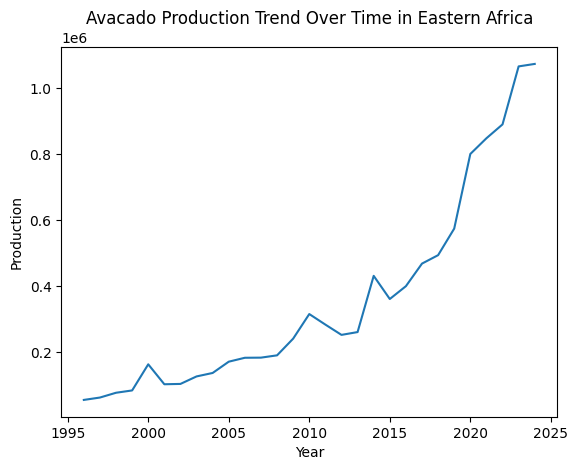

In [47]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(ts.index, ts["Value"])
plt.title("Avacado Production Trend Over Time in Eastern Africa")
plt.xlabel("Year")
plt.ylabel("Production")
plt.show();


Overall Avacado there has been an upward trend in Avacado production in Eastern Africa, with a notable pick from 2015.

**Moving Averages (3-year & 5-year)**

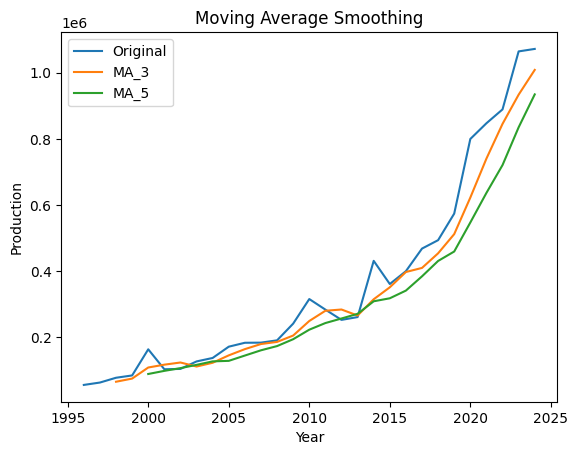

In [48]:
ts["MA_3"] = ts["Value"].rolling(window=3).mean()
ts["MA_5"] = ts["Value"].rolling(window=5).mean()

plt.figure()
plt.plot(ts.index, ts["Value"])
plt.plot(ts.index, ts["MA_3"])
plt.plot(ts.index, ts["MA_5"])
plt.title("Moving Average Smoothing")
plt.xlabel("Year")
plt.ylabel("Production")
plt.legend(["Original", "MA_3", "MA_5"])
plt.show()


The 3yrs and 5 yrs moving averages shows an updward trend in Avacado production.

LINEAR REGRESSION ON TIME

In [49]:
X = ts.index.values.reshape(-1,1)
y = ts["Value"].values

model = LinearRegression()
model.fit(X, y)

ts["LinearTrend"] = model.predict(X)



POLYNOMIAL TREND(Non-linear growth)

In [50]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)

ts["PolyTrend"] = poly_model.predict(X_poly)

LOWESS/LOESS Smoothing

In [51]:
lowess_smoothed = lowess(ts["Value"], ts.index, frac=0.2)

ts["LOWESS"] = lowess_smoothed[:,1]

Exponential Smoothing (Holt Linear Trend)

In [52]:
ts["Year"] = pd.to_datetime(ts.index, format="%Y")
ts.set_index("Year", inplace=True)


In [53]:
holt_model = Holt(ts["Value"]).fit()

ts["HoltTrend"] = holt_model.fittedvalues

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


FINAL PLOT COMPARISON

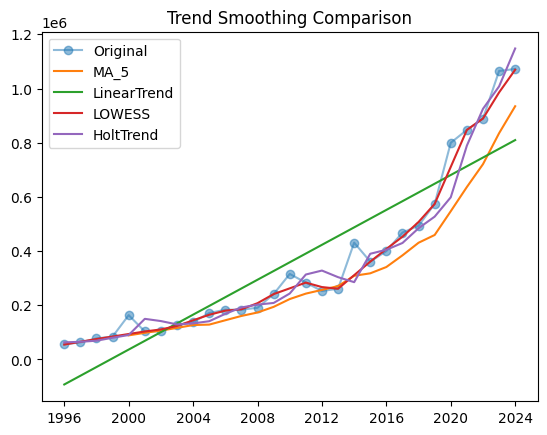

In [69]:
plt.figure()
plt.plot(ts.index, ts["Value"],'o-',alpha=0.5)
plt.plot(ts.index, ts["MA_5"])
plt.plot(ts.index, ts["LinearTrend"])
plt.plot(ts.index, ts["LOWESS"])
plt.plot(ts.index, ts["HoltTrend"])
plt.legend(["Original", "MA_5", "LinearTrend", "LOWESS", "HoltTrend"])
plt.title("Trend Smoothing Comparison")
plt.show();


The Holt's trend shows an upward trend and projects that Avacado production will keep increasing. However the Lowess shows some small seasonal related picks betaween 2008 and 2016.

Yied Vs Area Decomposition

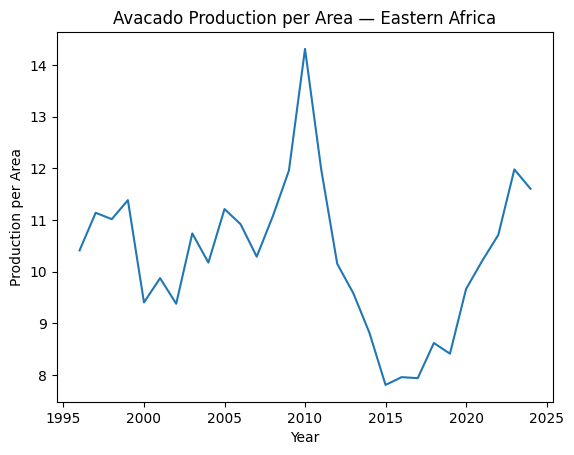

In [67]:
merged = merged[
    (merged["Item"].str.contains("Avocados", case=False, na=False)) &
    (merged["Area"] == "Eastern Africa")
]

# Reset index to make 'Year' a column, then sort, then set index again
merged = merged.reset_index()
merged = merged.sort_values("Year")
merged.set_index("Year", inplace=True)

#Basic Time-series PLot
plt.figure()
plt.plot(merged.index, merged["Production_per_area"])

plt.title("Avacado Production per Area — Eastern Africa")
plt.xlabel("Year")
plt.ylabel("Production per Area")
plt.show()

Despite the historical upward trend, Avacado production per area has drastically fallen from 2010 when it was at an all time high.

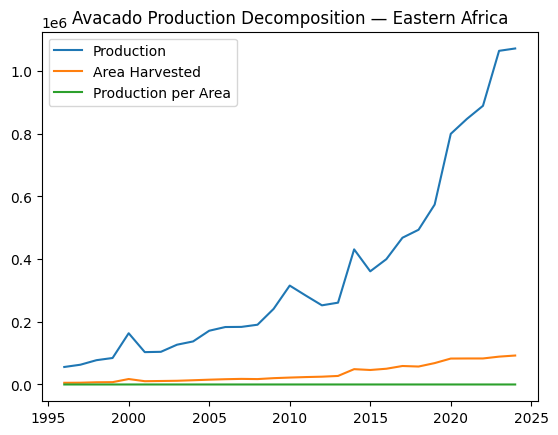

In [66]:
#Comparing Proponents
plt.figure()

plt.plot(merged.index, merged["Value_prod"], label="Production")
plt.plot(merged.index, merged["Value_area"], label="Area Harvested")
plt.plot(merged.index, merged["Production_per_area"], label="Production per Area")

plt.title("Avacado Production Decomposition — Eastern Africa")
plt.legend()
plt.show()



Despite the upward trend, the area harvested has been low but from 2020, we can observe a slight upward trend. the production per area has remained almost constant from 1996.